In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

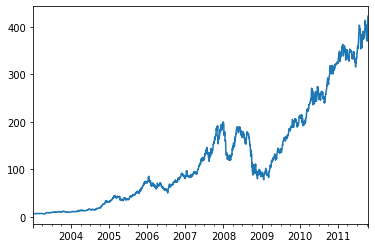

In [13]:
close_px.AAPL.plot()

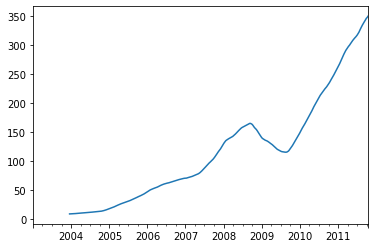

In [14]:
close_px.AAPL.rolling(250).mean().plot()

In [15]:
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

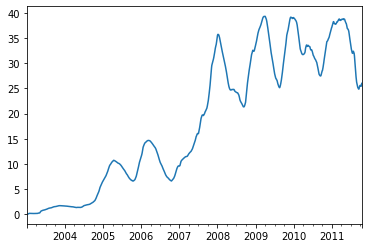

In [17]:
aapl_std250.plot()

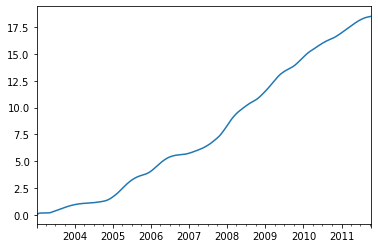

In [19]:
expanding_mean = aapl_std250.expanding().mean().plot()

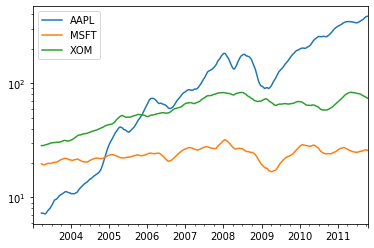

In [20]:
close_px.rolling(60).mean().plot(logy=True)

In [21]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


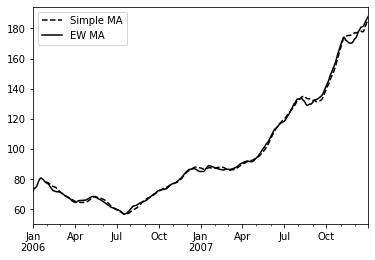

In [25]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

In [26]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

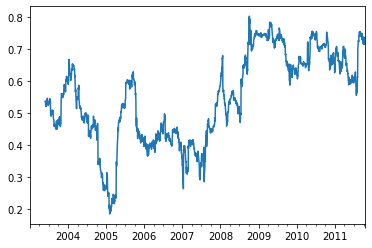

In [27]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

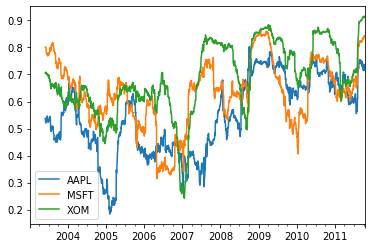

In [28]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [29]:
from scipy.stats import percentileofscore

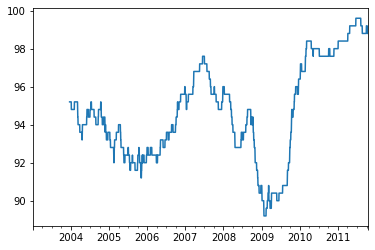

In [35]:
score_at_2percent = lambda x: percentileofscore(x, 0.04)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()